# Лабораторная работа №5.2

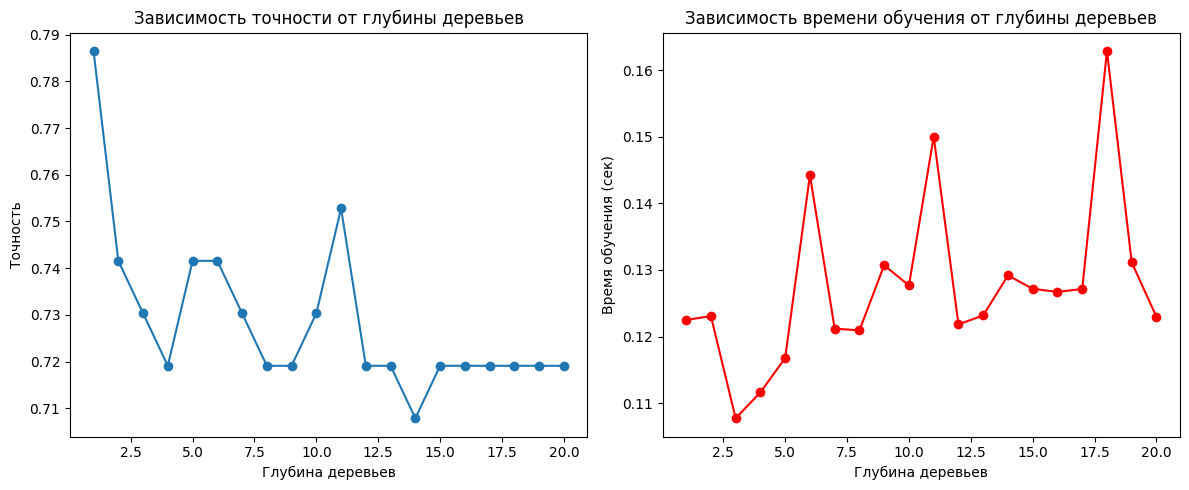

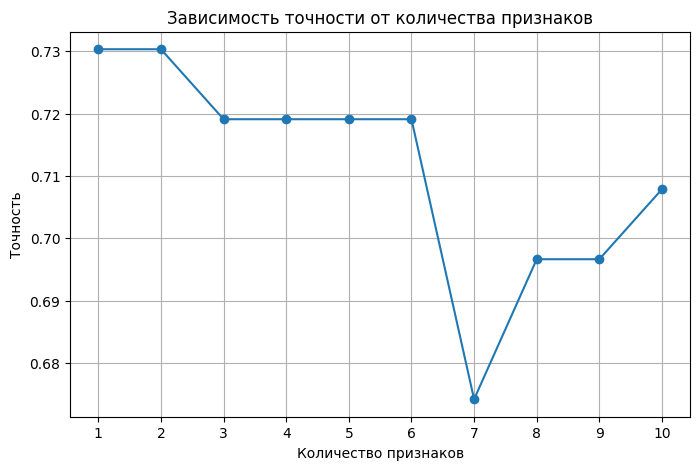

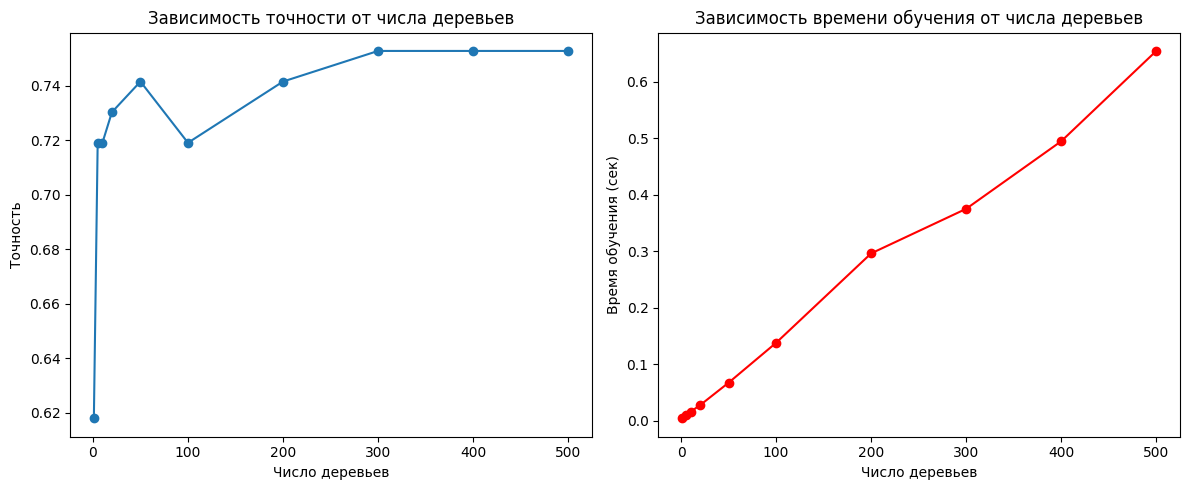

XGBoost результаты:
Точность: 0.7416
Время обучения: 0.0388 сек

Сравнение с Random Forest:
Лучшая точность Random Forest: 0.7528
Точность XGBoost: 0.7416

Вывод: Random Forest показал лучшую точность по сравнению с XGBoost


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
import xgboost as xgb
from xgboost import XGBClassifier

data = load_diabetes()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

y = (y > y.median()).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

depths = range(1, 21)
accuracy_depth = []
time_depth = []

for depth in depths:
    start_time = time.time()
    model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_depth.append(accuracy_score(y_test, y_pred))
    time_depth.append(time.time() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(depths, accuracy_depth, marker='o')
plt.title('Зависимость точности от глубины деревьев')
plt.xlabel('Глубина деревьев')
plt.ylabel('Точность')

plt.subplot(1, 2, 2)
plt.plot(depths, time_depth, marker='o', color='r')
plt.title('Зависимость времени обучения от глубины деревьев')
plt.xlabel('Глубина деревьев')
plt.ylabel('Время обучения (сек)')
plt.tight_layout()
plt.show()

max_features_range = range(1, X.shape[1] + 1)
accuracy_features = []

for max_features in max_features_range:
    model = RandomForestClassifier(n_estimators=100, max_features=max_features, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_features.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 5))
plt.plot(max_features_range, accuracy_features, marker='o')
plt.title('Зависимость точности от количества признаков')
plt.xlabel('Количество признаков')
plt.ylabel('Точность')
plt.xticks(max_features_range)
plt.grid()
plt.show()

n_estimators_range = [1, 5, 10, 20, 50, 100, 200, 300, 400, 500]
accuracy_trees = []
time_trees = []

for n_estimators in n_estimators_range:
    start_time = time.time()
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_trees.append(accuracy_score(y_test, y_pred))
    time_trees.append(time.time() - start_time)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(n_estimators_range, accuracy_trees, marker='o')
plt.title('Зависимость точности от числа деревьев')
plt.xlabel('Число деревьев')
plt.ylabel('Точность')

plt.subplot(1, 2, 2)
plt.plot(n_estimators_range, time_trees, marker='o', color='r')
plt.title('Зависимость времени обучения от числа деревьев')
plt.xlabel('Число деревьев')
plt.ylabel('Время обучения (сек)')
plt.tight_layout()
plt.show()

params = {
    'booster': 'gbtree',
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'n_estimators': 100,
    'objective': 'binary:logistic',
    'random_state': 42
}

start_time = time.time()
xgb_model = XGBClassifier(**params)
xgb_model.fit(X_train, y_train)
xgb_time = time.time() - start_time

y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"XGBoost результаты:")
print(f"Точность: {xgb_accuracy:.4f}")
print(f"Время обучения: {xgb_time:.4f} сек")

best_rf_accuracy = max(accuracy_trees)
print(f"\nСравнение с Random Forest:")
print(f"Лучшая точность Random Forest: {best_rf_accuracy:.4f}")
print(f"Точность XGBoost: {xgb_accuracy:.4f}")

if xgb_accuracy > best_rf_accuracy:
    print("\nВывод: XGBoost показал лучшую точность по сравнению с Random Forest")
elif xgb_accuracy < best_rf_accuracy:
    print("\nВывод: Random Forest показал лучшую точность по сравнению с XGBoost")
else:
    print("\nВывод: Модели показали одинаковую точность")